In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scikitplot as skplt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
heart = pd.read_csv(r"C:\Users\Ayesha\Downloads\heart (ML 5215).csv")

In [4]:
# Display the first 5 rows of the data to understand the nature of the values
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#generating a concise summary of features
#helps understand the structure of the DataFrame + identifying missing or null values
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#generating a quick overview of the distribution and range for each feature
#can help identify potential outliers or issues with the data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


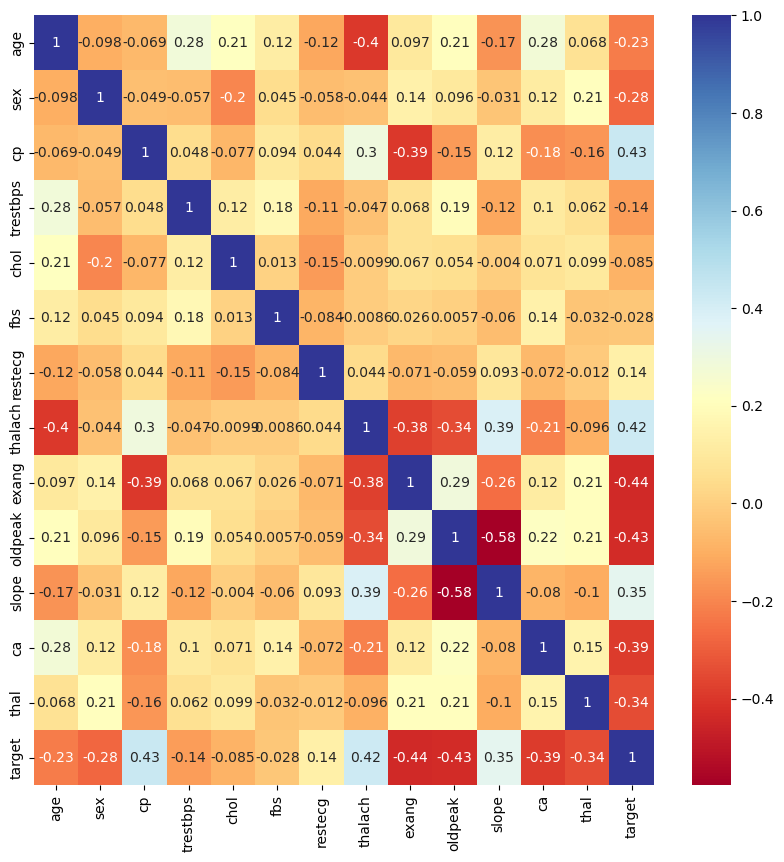

In [7]:
#Performing feature selection and understanding the correlation btw different features and the target values
import seaborn as sns
corr_matrix = heart.corr()

#idenfying features with higest correlation
#helps understand which features are most relevant for predicting target variable 
significant_features = corr_matrix.index
plt.figure(figsize = (10,10))

#plotting a heatmap
# Plot heatmap
heatmap = sns.heatmap(corr_matrix.loc[significant_features, significant_features], cmap="RdYlBu", annot=True)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

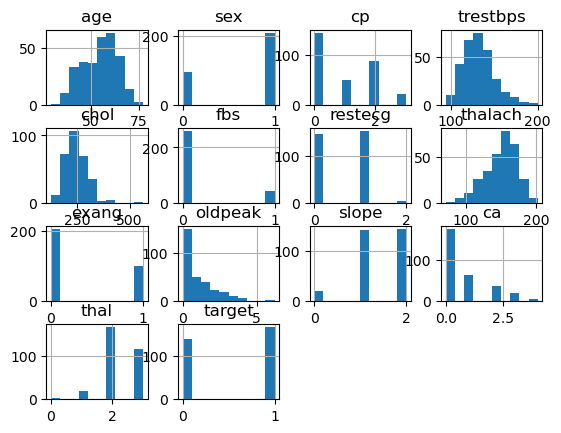

In [8]:
#generating distograms to visualise the distribution of data
heart.hist()

<Axes: xlabel='target', ylabel='count'>

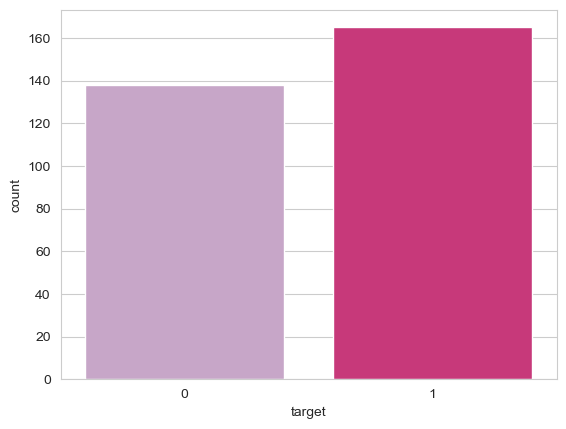

In [9]:
#identifying whether that DataFrame is balanced or imbalanced
sns.set_style('whitegrid')
sns.countplot(x = 'target',data = heart, palette = "PuRd")

In [10]:
#converting categorical variables into dummy variables

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dummy = pd.get_dummies(heart, columns=categorical_cols, drop_first=True)

In [11]:
#performing standard scaling
#helps bring the features to a standard normal distribution and helps in dealing with features in different units


from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# select the columns to be scaled - select non-catergorical variables excluding target
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# fit and transform the selected columns
dummy[cols_to_scale] = scaler.fit_transform(dummy[cols_to_scale])

In [12]:
#observing changes in the dataframe
dummy.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dummy.drop('target', axis=1), dummy['target'], test_size=0.3, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV

models = [    
    {'name': 'LogisticRegression',        
               'model': LogisticRegression(random_state=1),        
               'params': {            
                   'C': [0.1, 0.4, 0.7, 1],
                   'multi_class': ['auto', 'ovr', 'multinomial'],
                   'solver': ['newton-cg']
        }
    },
    {'name': 'RandomForest',
     'model': RandomForestClassifier(random_state=1),
     'params': {
            'n_estimators': [10, 50, 100, 200],
            'criterion': ['gini', 'entropy'],
            'max_features': ['sqrt', 'log2'],
            'max_depth': [2, 3, 4, 5]
        }
    },
    {
    'name': 'KNN',
    'model': KNeighborsClassifier(),
    'params': {
            'n_neighbors': [3, 4, 5, 6, 7],
            'weights': ['uniform', 'distance']
        }
    }
]
#Iterating over the models, performing grid search cv to find the best hyperparameters and displaying their scores

best_models = []
for model in models:
    clf = GridSearchCV(model['model'], model['params'], cv=5)
    clf.fit(X_train, y_train)
    best_score = clf.best_score_
    best_estimator = clf.best_estimator_
    accuracy = best_estimator.score(X_test, y_test)
    print(f"Mean Cross-Validated score of best {model['name']}: {clf.best_score_:.16f}")
    print(f"Accuracy of {model['name']} on test data: {accuracy:.16f}")
    best_models.append({
        'name': model['name'],
        'model': best_estimator,
        'accuracy': accuracy
    })


Mean Cross-Validated score of best LogisticRegression: 0.8156146179401993
Accuracy of LogisticRegression on test data: 0.8571428571428571
Mean Cross-Validated score of best RandomForest: 0.8156146179401993
Accuracy of RandomForest on test data: 0.8241758241758241
Mean Cross-Validated score of best KNN: 0.7971207087486156
Accuracy of KNN on test data: 0.7582417582417582


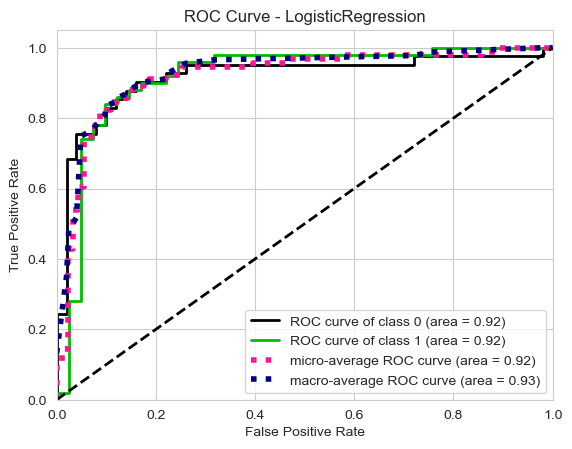

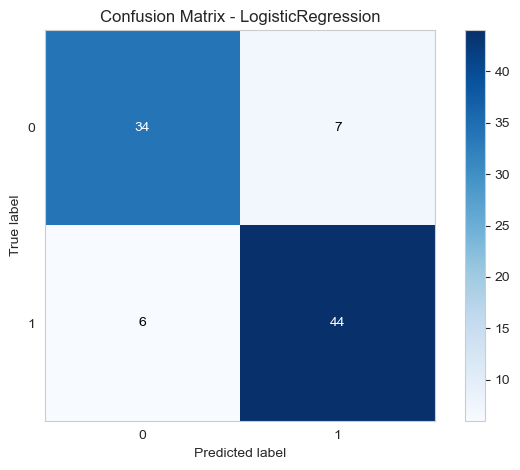

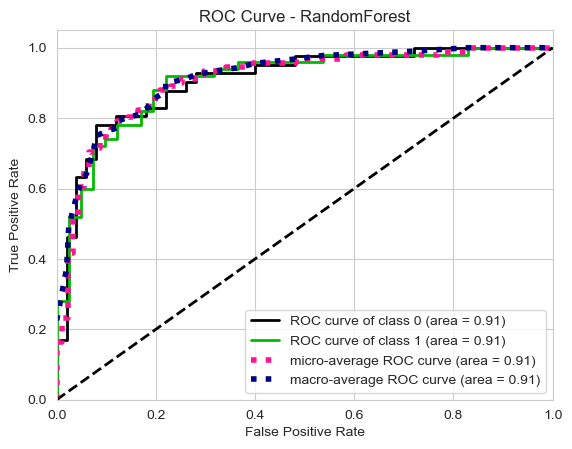

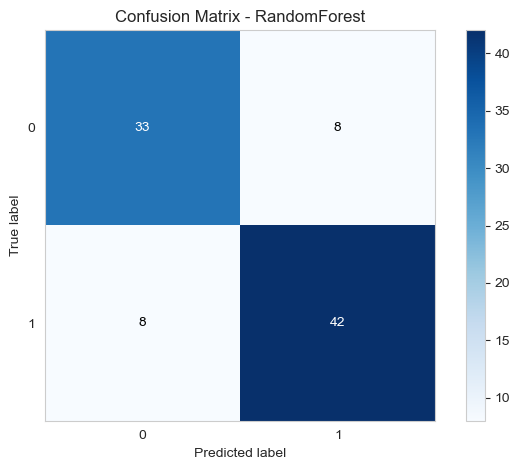

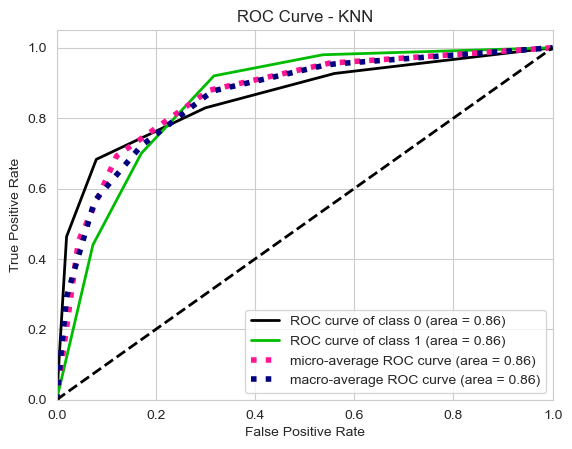

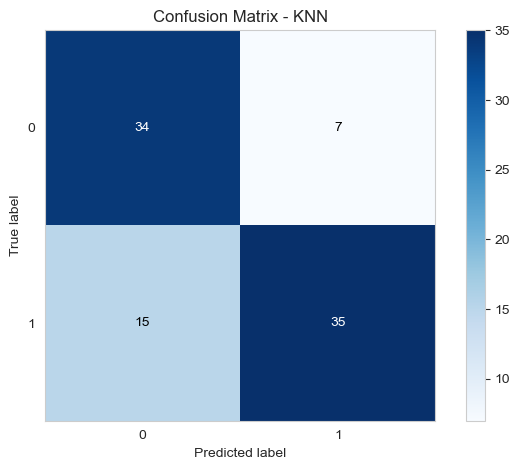

In [15]:
import scikitplot as skplt

# Iterate over the best models obtained from GridSearchCV
for best_model in best_models:
    # Generate predicted probabilities and predicted labels for the test set
    y_probas = best_model['model'].predict_proba(X_test)
    y_pred = best_model['model'].predict(X_test)
    
    # Plot ROC curve
    skplt.metrics.plot_roc(y_test, y_probas)
    plt.title(f"ROC Curve - {best_model['name']}")
    plt.show()

    # Plot confusion matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    plt.title(f"Confusion Matrix - {best_model['name']}")
    plt.tight_layout()
    plt.show()
